# USA PPA KDE Plot

In [ ]:
!pip install pandas seaborn contextily matplotlib

In [1]:
import os
import pandas as pd
import geopandas as gpd
import seaborn
import contextily
import matplotlib.pyplot as plt

In [4]:
in_file = os.path.join('..','in','datacenters_usa_clean.csv')

#dc_df = datacenter_dataframe
dc_df = pd.read_csv(in_file)

# Create a GeoDataFrame
dc_gdf = gpd.GeoDataFrame(dc_df, geometry=gpd.points_from_xy(dc_df.longitude, dc_df.latitude))

# Define or identify the coordinate reference system (CRS)
# For the United States, you can use EPSG:4326 (WGS 84) which is commonly used for latitude and longitude coordinates
dc_gdf.crs = "EPSG:4326"

# create a version without hawaii
dc_gdf_filtered = dc_gdf[dc_gdf['state'] != 'Hawaii']

In [5]:
def kde_plot(df):
    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(20, 20))

    # Generate and add KDE with a shading of 50 gradients, coloured contours, 75% of transparency,
    # and the reverse viridis colormap
    seaborn.kdeplot(
        x="longitude",
        y="latitude",
        data=df,
        n_levels=100,
        fill=True,
        alpha=0.4,
        cmap="viridis_r",
        ax=ax
    )

    # Add the points themselves to the plot
    ax.scatter(
        df['longitude'],
        df['latitude'],
        s=5,  # Size of points
        c='red',  # Color of points
        alpha=0.3  # Transparency of points
    )

    # Add basemap
    contextily.add_basemap(
        ax=ax,
        crs="EPSG:4326",
        source=contextily.providers.CartoDB.PositronNoLabels,
    )

    # Remove axes
    ax.set_axis_off()

    # Display the plot
    plt.show()


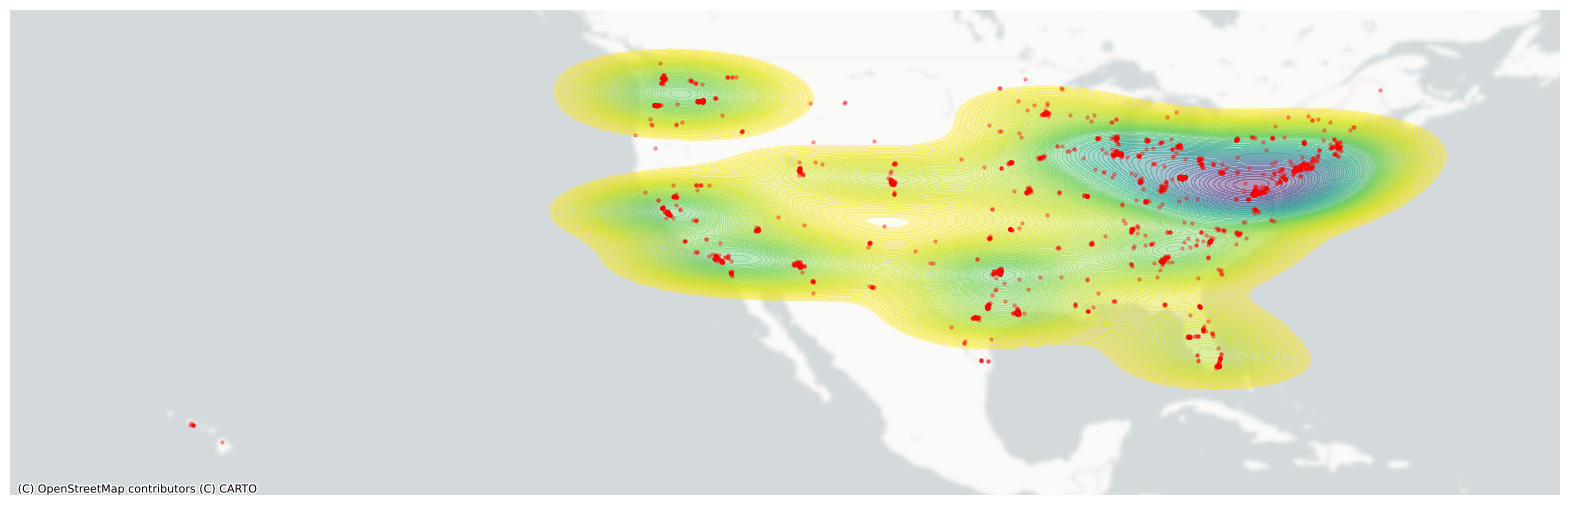

In [6]:
kde_plot(dc_gdf)